In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pprint

In [15]:
Ocean_Temps = Path("Ocean_Temps.csv")
ocean_df = pd.read_csv(Ocean_Temps)
ocean_df


,time,weather_code (wmo code),temperature_2m_max (°F),temperature_2m_min (°F),wind_speed_10m_max (mp/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,1/1/1945,1,75.1,57.2,17.9,137,7.19
1,1/2/1945,1,80.3,56.2,13.0,157,6.96
2,1/3/1945,51,70.7,61.0,11.4,190,3.79
3,1/4/1945,2,70.7,61.1,15.2,156,5.46
4,1/5/1945,0,84.7,58.6,10.3,146,7.44
...,...,...,...,...,...,...,...
28869,1/16/2024,55,73.7,64.8,24.0,150,5.47
28870,1/17/2024,1,73.5,64.7,29.5,133,5.66
28871,1/18/2024,0,76.8,64.8,31.3,124,6.26
28872,1/19/2024,0,86.6,65.2,23.5,120,7.15


In [9]:
# Convert 'time' column to datetime

ocean_df['time'] = pd.to_datetime(ocean_df['time'])


# Create a boolean mask to filter rows where the month is not September
mask = ocean_df['time'].dt.month != 9

# Filter the DataFrame using the boolean mask
sept_ocean_data = ocean_df[~mask]

sept_ocean_data_backup = sept_ocean_data

ocean_df['year'] = ocean_df['time'].dt.year

sept_ocean_data

,time,weather_code (wmo code),temperature_2m_max (°F),temperature_2m_min (°F),wind_speed_10m_max (mp/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm),year
243,1945-09-01,51,59.5,49.3,11.7,333,2.00,1945
244,1945-09-02,3,60.1,47.4,9.3,336,1.94,1945
245,1945-09-03,3,60.3,48.8,10.1,328,2.30,1945
246,1945-09-04,55,59.3,52.0,12.3,170,2.34,1945
247,1945-09-05,2,61.4,51.4,12.4,148,2.91,1945
...,...,...,...,...,...,...,...,...
28757,2023-09-26,51,63.3,56.4,13.7,143,3.48,2023
28758,2023-09-27,0,64.7,56.3,24.3,125,3.61,2023
28759,2023-09-28,1,72.1,55.4,9.4,109,4.11,2023
28760,2023-09-29,51,68.3,57.5,17.6,307,3.02,2023


In [10]:



average_max_temp = sept_ocean_data.groupby(['year']).mean().reset_index()

average_max_temp



,year,time,weather_code (wmo code),temperature_2m_max (°F),temperature_2m_min (°F),wind_speed_10m_max (mp/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,1945,1945-09-15 12:00:00,25.566667,65.646667,53.420000,11.696667,194.900000,2.839000
1,1946,1946-09-15 12:00:00,35.933333,61.250000,50.146667,11.866667,225.200000,2.511333
2,1947,1947-09-15 12:00:00,32.133333,62.130000,50.490000,11.840000,185.333333,2.670000
3,1948,1948-09-15 12:00:00,30.000000,60.400000,48.750000,12.526667,233.300000,2.655000
4,1949,1949-09-15 12:00:00,29.033333,63.376667,51.976667,12.990000,220.700000,2.766333
...,...,...,...,...,...,...,...,...
74,2019,2019-09-15 12:00:00,24.333333,65.336667,57.003333,19.866667,195.933333,3.050000
75,2020,2020-09-15 12:00:00,28.366667,60.860000,53.223333,19.173333,218.033333,2.734000
76,2021,2021-09-15 12:00:00,25.333333,61.570000,54.183333,21.096667,197.900000,2.994333
77,2022,2022-09-15 12:00:00,27.366667,61.663333,53.810000,18.273333,218.466667,2.859667


In [37]:
# # First Box Plot
# desert_evap = merged_data_set["Desert Evapotrasnpiration"]
# named_storms = merged_data_set["Named Storms"].values
# year_by_decade = (merged_data_set["Year"]//10)*10


# #create the box plot
# plt.figure(figsize=(10,20))
# plt.boxplot([desert_evap, named_storms])
# plt.yticks(year)
# plt.xlabel("Named Storms")
# plt.ylabel("Year")
# plt.title("Named Storms Compared to Desert Evaporation")

# plt.show


In [17]:
merged_data_set = pd.read_csv("merged.csv")

merged_data_set

,Year,Named Storms,Hurricanes,MajorHurricanes,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration
0,1945,11,5,2,65.646667,53.420000,11.696667,194.900000,2.839000,89.376667,65.470000,14.916667,135.400000,8.351000
1,1946,6,3,1,61.250000,50.146667,11.866667,225.200000,2.511333,87.130000,64.520000,15.170000,124.500000,7.961333
2,1947,9,5,2,62.130000,50.490000,11.840000,185.333333,2.670000,88.626667,67.623333,16.666667,132.966667,7.877333
3,1948,9,6,4,60.400000,48.750000,12.526667,233.300000,2.655000,89.186667,68.453333,13.246667,121.800000,7.400333
4,1949,13,7,3,63.376667,51.976667,12.990000,220.700000,2.766333,87.946667,64.596667,15.620000,143.000000,8.413667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2013,14,2,0,58.763333,54.073333,12.596667,255.566667,2.723000,91.760000,68.343333,13.713333,170.600000,7.743000
69,2014,8,6,2,61.203333,55.613333,11.620000,216.966667,2.730333,92.663333,69.330000,15.270000,96.366667,8.317667
70,2015,11,4,2,61.023333,55.083333,12.553333,207.900000,2.584667,92.596667,70.083333,13.420000,147.900000,7.361000
71,2016,15,7,4,60.666667,55.720000,10.856667,193.333333,2.775000,92.130000,69.736667,14.666667,108.900000,8.014333


In [8]:
# # Define the year ranges
# start_year = 1945
# end_year = 2017

# # of bins
# num_bins = 10

# bin_width = (end_year - start_year) / num_bins

# year_bins = np.arange(start_year, end_year + bin_width, bin_width)
# labels = ["1945


# # bin_width


# merged_data_set["Year"] = pd.cut(merged_data_set




# # Establish the bins
# # year_bins = [

array([1945. , 1952.2, 1959.4, 1966.6, 1973.8, 1981. , 1988.2, 1995.4,
       2002.6, 2009.8, 2017. , 2024.2])

In [30]:
# Establish bin
year_bins = [1945, 1955, 1965, 1975, 1985, 1995, 2005, 2017]
labels = ["1945-1954", "1955-1964", "1965-1974", "1975-1984", "1985-1994", "1995-2004", "2005-2017"]


# Use `pd.cut` to categorize year into bins.

merged_data_set["Year Bucket"] = pd.cut(merged_data_set["Year"].astype(int),year_bins, labels=labels)

merged_data_set




,Year,Named Storms,Hurricanes,MajorHurricanes,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration,Year Bucket
0,1945,11,5,2,65.646667,53.420000,11.696667,194.900000,2.839000,89.376667,65.470000,14.916667,135.400000,8.351000,NaN
1,1946,6,3,1,61.250000,50.146667,11.866667,225.200000,2.511333,87.130000,64.520000,15.170000,124.500000,7.961333,1945-1954
2,1947,9,5,2,62.130000,50.490000,11.840000,185.333333,2.670000,88.626667,67.623333,16.666667,132.966667,7.877333,1945-1954
3,1948,9,6,4,60.400000,48.750000,12.526667,233.300000,2.655000,89.186667,68.453333,13.246667,121.800000,7.400333,1945-1954
4,1949,13,7,3,63.376667,51.976667,12.990000,220.700000,2.766333,87.946667,64.596667,15.620000,143.000000,8.413667,1945-1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2013,14,2,0,58.763333,54.073333,12.596667,255.566667,2.723000,91.760000,68.343333,13.713333,170.600000,7.743000,2005-2017
69,2014,8,6,2,61.203333,55.613333,11.620000,216.966667,2.730333,92.663333,69.330000,15.270000,96.366667,8.317667,2005-2017
70,2015,11,4,2,61.023333,55.083333,12.553333,207.900000,2.584667,92.596667,70.083333,13.420000,147.900000,7.361000,2005-2017
71,2016,15,7,4,60.666667,55.720000,10.856667,193.333333,2.775000,92.130000,69.736667,14.666667,108.900000,8.014333,2005-2017


In [31]:

test_df = merged_data_set.groupby("Year Bucket")["MajorHurricanes"].sum().to_frame().reset_index()

test_df

# test_df =pd.DataFrame

C:\Users\LakiaWhite\AppData\Local\Temp\ipykernel_69092\1037387603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df = merged_data_set.groupby("Year Bucket")["MajorHurricanes"].sum().to_frame().reset_index()


,Year Bucket,MajorHurricanes
0,1945-1954,38
1,1955-1964,30
2,1965-1974,18
3,1975-1984,18
4,1985-1994,16
5,1995-2004,40
6,2005-2017,36


<Axes: >

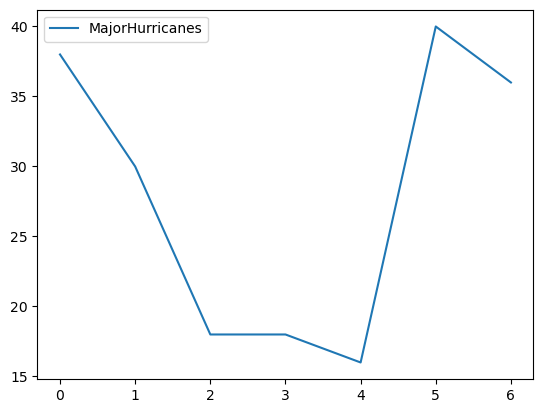

In [32]:

test_df.plot()




In [36]:
summary = merged_data_set.describe()

summary

,Year,Named Storms,Hurricanes,MajorHurricanes,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1497.527141,19.043576,14.605720,11.575184,54.932924,49.839572,19.329921,177.198810,11.160797,77.309707,59.997788,20.160822,132.810017,14.951014
std,895.583198,23.066568,23.942976,24.937197,22.191821,20.776607,22.355540,86.055066,25.003957,31.213090,23.731225,21.934042,69.649259,23.599472
min,21.217131,4.000000,2.000000,0.000000,1.291516,1.456989,1.422659,22.262626,0.132916,1.734775,1.713629,1.353695,44.171459,0.484624
25%,1477.000000,7.035782,3.660070,1.666860,59.298333,52.557500,11.124167,145.550000,2.542917,83.597500,65.684167,12.832500,90.500000,7.164583
50%,1972.000000,11.102740,6.102740,2.356164,60.395936,54.739795,12.238356,212.480594,2.706064,90.029772,67.591005,14.118105,126.666667,7.730578
75%,1985.500000,16.750000,9.750000,5.000000,62.141667,55.792500,15.077500,223.850000,2.855083,91.085833,69.560833,15.943333,156.281507,8.207833
max,2017.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,273.633333,73.000000,93.943333,73.000000,73.000000,270.000000,73.000000
